<a href="https://colab.research.google.com/github/condor68mihon/InformationTheory/blob/master/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%2204_Distribution_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Оценка распределения

In [ ]:
import numpy as np
np.set_printoptions(legacy='1.25')
import pandas as pd
import matplotlib.pyplot as plt

## Пять мешков

In [ ]:
# зададим априорную вероятность
initial_prior = 1/5

In [ ]:
# и возрастающее от 0 до 1 правдоподобие белого шара
white_likelihood = np.linspace(0, 1, num = 5)
white_likelihood

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [ ]:
# найдем правдоподобие черного шара
black_likelihood = 1 - white_likelihood
black_likelihood

array([1.  , 0.75, 0.5 , 0.25, 0.  ])

### Один белый шар

In [ ]:
# создадим датафрейм, где индексом будут мешки
# w (white) означает, что мы исследуем появление одного белого шара
w = pd.DataFrame(index = ['B1', 'B2', 'B3', 'B4', 'B5'])

# добавим априорную вероятность и
w['prior'] = initial_prior
# правдоподобие
w['likelihood'] = white_likelihood
# найдем числитель формулы Байеса
w['numerator'] = w['prior'] * w['likelihood']

w

,prior,likelihood,numerator
B1,0.2,0.00,0.00
B2,0.2,0.25,0.05
B3,0.2,0.50,0.10
B4,0.2,0.75,0.15
B5,0.2,1.00,0.20


In [ ]:
# найдем знаменатель, т.е. вероятность данных
prob_data = w['numerator'].sum()
prob_data

0.5

In [ ]:
# найдем апостериорную вероятность
w['posterior'] = w['numerator'] / prob_data
w

,prior,likelihood,numerator,posterior
B1,0.2,0.00,0.00,0.0
B2,0.2,0.25,0.05,0.1
B3,0.2,0.50,0.10,0.2
B4,0.2,0.75,0.15,0.3
B5,0.2,1.00,0.20,0.4


In [ ]:
# обратим внимание, что сумма апостериорных вероятностей равна единице,
w['posterior'].sum()

1.0

In [ ]:
# а вот сумма правдоподобий единице равна быть не должна
w['likelihood'].sum()

2.5

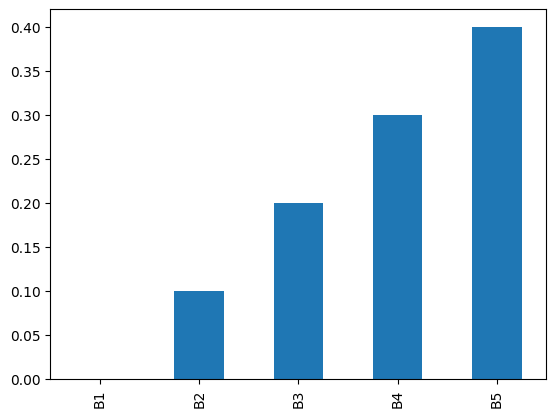

In [ ]:
# посмотрим на апостериорную вероятность на графике
w['posterior'].plot.bar();

### Два белых шара

In [ ]:
ww = pd.DataFrame(index = ['B1', 'B2', 'B3', 'B4', 'B5'])
ww['prior'] = initial_prior
ww['likelihood'] = white_likelihood ** 2
ww['numerator'] = ww['prior'] * ww['likelihood']

prob_data = ww['numerator'].sum()

ww['posterior'] = ww['numerator'] / prob_data
ww

,prior,likelihood,numerator,posterior
B1,0.2,0.0000,0.0000,0.000000
B2,0.2,0.0625,0.0125,0.033333
B3,0.2,0.2500,0.0500,0.133333
B4,0.2,0.5625,0.1125,0.300000
B5,0.2,1.0000,0.2000,0.533333


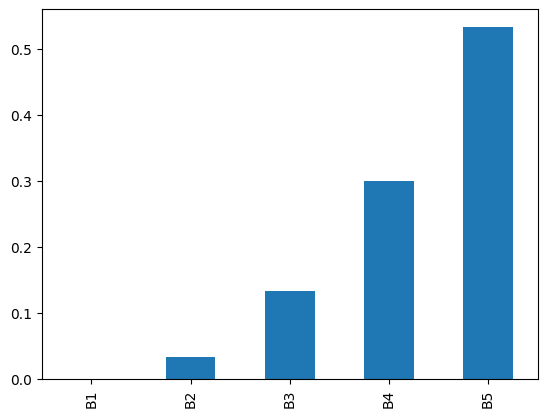

In [ ]:
ww['posterior'].plot.bar();

### Два белых и один черный шар

In [ ]:
wwb = pd.DataFrame(index = ['B1', 'B2', 'B3', 'B4', 'B5'])
wwb['prior'] = initial_prior
wwb['likelihood'] = white_likelihood ** 2 * black_likelihood
wwb['numerator'] = wwb['prior'] * wwb['likelihood']

prob_data = wwb['numerator'].sum()

wwb['posterior'] = wwb['numerator'] / prob_data
wwb

,prior,likelihood,numerator,posterior
B1,0.2,0.000000,0.000000,0.00
B2,0.2,0.046875,0.009375,0.15
B3,0.2,0.125000,0.025000,0.40
B4,0.2,0.140625,0.028125,0.45
B5,0.2,0.000000,0.000000,0.00


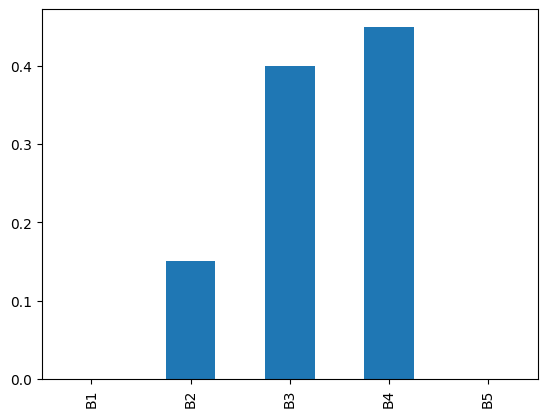

In [ ]:
wwb['posterior'].plot.bar();

### Биномиальное распределение

In [ ]:
# посмотрим на правдоподобие достать один белый шар
# (по сути испытание Бернулли)
from scipy.stats import binom
binom.pmf(k = 1, n = 1, p = white_likelihood)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [ ]:
wwb2 = pd.DataFrame(index = ['B1', 'B2', 'B3', 'B4', 'B5'])
wwb2['prior'] = initial_prior
wwb2['likelihood'] = binom.pmf(k = 2, n = 3, p = white_likelihood)
wwb2['numerator'] = wwb2['prior'] * wwb2['likelihood']

prob_data = wwb2['numerator'].sum()

wwb2['posterior'] = wwb2['numerator'] / prob_data
wwb2

,prior,likelihood,numerator,posterior
B1,0.2,0.000000,0.000000,0.00
B2,0.2,0.140625,0.028125,0.15
B3,0.2,0.375000,0.075000,0.40
B4,0.2,0.421875,0.084375,0.45
B5,0.2,0.000000,0.000000,0.00


## 100 мешков

In [ ]:
def create_table(n_bags, k_whites, n_balls):

  # создадим список из мешков
  bags = np.arange(1, n_bags + 1)
  # и соответствующие правдоподобия
  white_likelihood = np.linspace(0.0, 1.0, num = n_bags)

  # построим таблицу априорных и апостериорных вероятностей
  table = pd.DataFrame(index = bags)
  table['prior'] = 1/n_bags
  table['likelihood'] = binom.pmf(k = k_whites, n = n_balls, p = white_likelihood)
  table['numerator'] = table['prior'] * table['likelihood']
  prob_data = table['numerator'].sum()
  table['posterior'] = table['numerator'] / prob_data
  return table

In [ ]:
def create_plot(prior, posterior, name):
  prior.plot(label = 'prior')
  posterior.plot(label = 'posterior')
  plt.legend()
  plt.title(name)
  plt.xlabel('Bag')
  plt.ylabel('P(Bag)')

In [ ]:
# протестируем функцию на пяти мешках и двух белых и одном черном шаре
bags_5_wwb = create_table(5, 2, 3)
bags_5_wwb

,prior,likelihood,numerator,posterior
1,0.2,0.000000,0.000000,0.00
2,0.2,0.140625,0.028125,0.15
3,0.2,0.375000,0.075000,0.40
4,0.2,0.421875,0.084375,0.45
5,0.2,0.000000,0.000000,0.00


### Один белый шар

In [ ]:
bags_100_w = create_table(100, 1, 1)
bags_100_w.head()

,prior,likelihood,numerator,posterior
1,0.01,0.000000,0.000000,0.000000
2,0.01,0.010101,0.000101,0.000202
3,0.01,0.020202,0.000202,0.000404
4,0.01,0.030303,0.000303,0.000606
5,0.01,0.040404,0.000404,0.000808


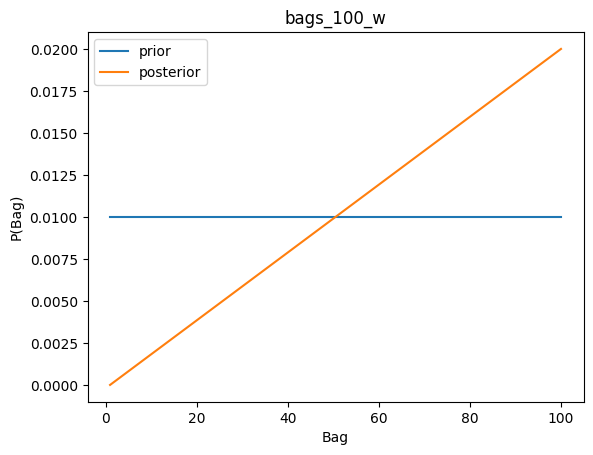

In [ ]:
create_plot(bags_100_w['prior'], bags_100_w['posterior'], 'bags_100_w')

### Два белых шара

In [ ]:
bags_100_ww = create_table(100, 2, 2)

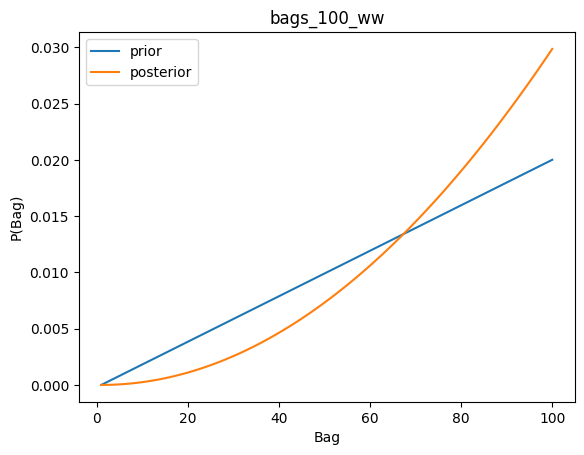

In [ ]:
create_plot(bags_100_w['posterior'],
            bags_100_ww['posterior'], 'bags_100_ww')

### Два белых и один черный шар

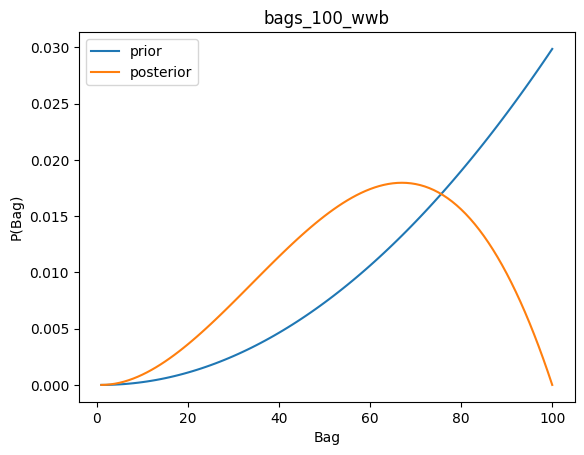

In [ ]:
bags_100_wwb = create_table(100, 2, 3)
create_plot(bags_100_ww['posterior'],
            bags_100_wwb['posterior'], 'bags_100_wwb')

In [ ]:
MAP = bags_100_wwb['posterior'].idxmax()
MAP

67

In [ ]:
MLE = bags_100_wwb['likelihood'].idxmax()
MLE

67

In [ ]:
bags_100_wwb.iloc[65:68, [1,3]]

,likelihood,posterior
66,0.444141,0.017947
67,0.444444,0.017959
68,0.444135,0.017947


### Логарифмическая функция правдоподобия

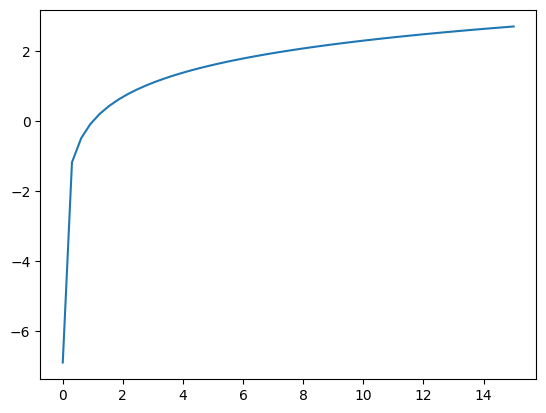

In [ ]:
x = np.linspace(0.001, 15)
y = np.log(x)
plt.plot(x,y);

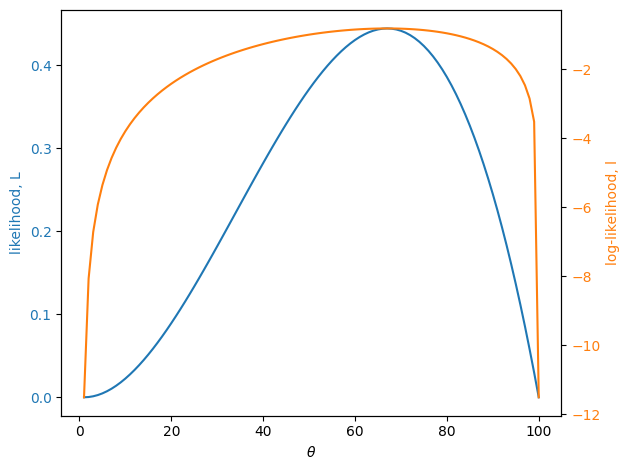

In [ ]:
L = bags_100_wwb['likelihood']
# добавим небольшую константу, чтобы не было ошибки из-за логарифма нуля
l = np.log(bags_100_wwb['likelihood'] + 10 ** (-5))

# построим два графика с разными шкалами по оси y
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel(r'$\theta$')
ax1.set_ylabel('likelihood, L', color = color)
ax1.plot(L, color=color)
ax1.tick_params(axis = 'y', labelcolor = color)

ax2 = ax1.twinx()

color = 'tab:orange'
ax2.set_ylabel('log-likelihood, l', color = color)
ax2.plot(l, color=color)
ax2.tick_params(axis = 'y', labelcolor = color)

fig.tight_layout()
plt.show()

### Семь белых из десяти

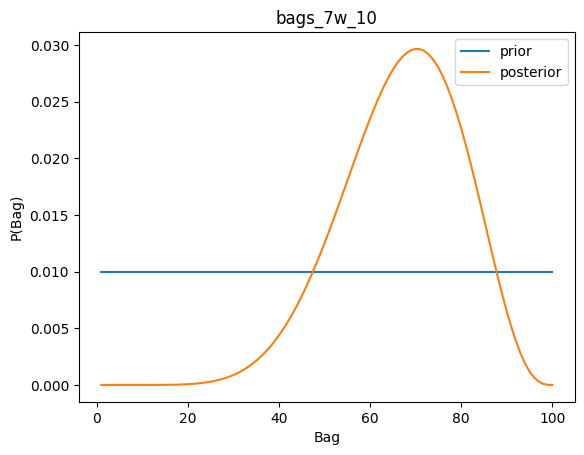

In [ ]:
bags_7w_10 = create_table(100, 7, 10)
create_plot(bags_7w_10['prior'],
            bags_7w_10['posterior'], 'bags_7w_10')

In [ ]:
MLE = bags_7w_10['likelihood'].idxmax()
MLE

70

### Другая априорная вероятность

In [ ]:
# создадим возрастающую и убывающую последовательности
up = np.arange(50)
# (напомню, код ниже создает последовательность от 50 до 1
# с убывающим шагом -1)
down = np.arange(50, 0, -1)
# соединим эти последовательности
up_and_down = np.append(up, down)

# создадим объект Series
triangle_prior = pd.Series(up_and_down)
# нормализуем каждое значение,
# чтобы площадь под треугольником была равна единице
triangle_prior /= triangle_prior.sum()

In [ ]:
# создадим уже знакомую таблицу
n_bags = 100

bags = np.arange(1, n_bags + 1)
white_likelihood = np.linspace(0, 1, num = n_bags)

bags_triangle = pd.DataFrame(index = bags)

# отличие будет только в априорной вероятности
bags_triangle['prior'] = triangle_prior
bags_triangle['likelihood'] = binom.pmf(k = 7, n = 10, p = white_likelihood)

bags_triangle['numerator'] = bags_triangle['prior'] * bags_triangle['likelihood']
prob_data = bags_triangle['numerator'].sum()
bags_triangle['posterior'] = bags_triangle['numerator'] / prob_data

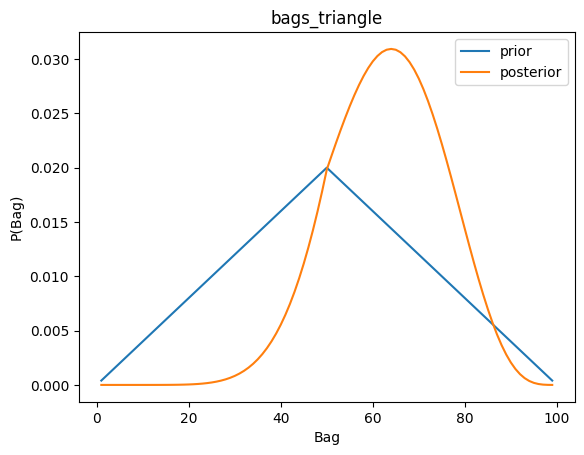

In [ ]:
create_plot(bags_triangle['prior'],
            bags_triangle['posterior'], 'bags_triangle')

In [ ]:
# априорный максимум
bags_triangle['prior'].idxmax()

50

In [ ]:
# оценка максимального правдоподобия
bags_triangle['likelihood'].idxmax()

70

In [ ]:
# апостериорный максимум
bags_triangle['posterior'].idxmax()

64

## Бесконечное количество гипотез

### Априорная вероятность

In [ ]:
def prior(theta):
  return 2 * theta

In [ ]:
theta = np.linspace(0, 1, 100)

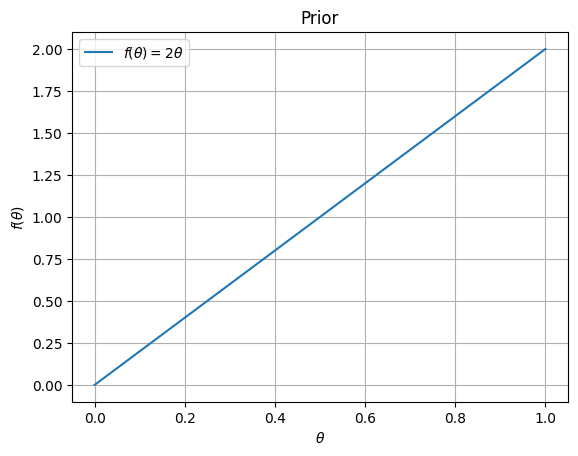

In [ ]:
plt.plot(theta, prior(theta), label = r'$f(\theta) = 2\theta$')
plt.legend()
plt.title('Prior')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$f(\theta)$')
plt.grid()
plt.show()

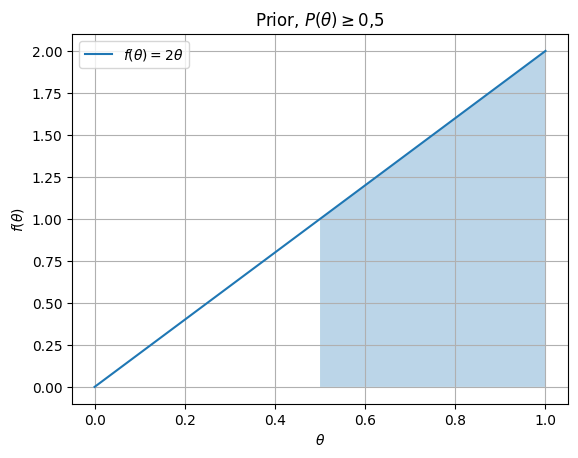

In [ ]:
fill_theta = np.linspace(0.5, 1, 100)
plt.plot(theta, prior(theta), label = r'$f(\theta) = 2\theta$')
plt.fill_between(fill_theta, prior(fill_theta), alpha = 0.3)
plt.legend()
plt.title(r'Prior, $P(\theta) \geq 0{,}5$')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$f(\theta)$')
plt.grid()
plt.show()

In [ ]:
from scipy.integrate import quad
quad(prior, 0.5, 1)[0]

0.75

### Апостериорная вероятность

In [ ]:
def posterior(theta):
  return 3 * theta**2

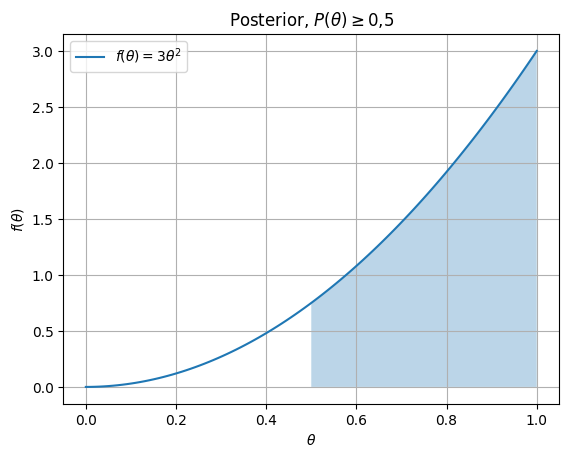

In [ ]:
plt.plot(theta, posterior(theta), label = r'$f(\theta) = 3\theta^2$')
plt.fill_between(fill_theta, posterior(fill_theta), alpha = 0.3)
plt.legend()
plt.title(r'Posterior, $P(\theta) \geq 0{,}5$')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$f(\theta)$')
plt.grid()
plt.show()

In [ ]:
quad(posterior, 0.5, 1)[0]

0.875

### Равномерная априорная вероятность

In [ ]:
from scipy.stats import uniform

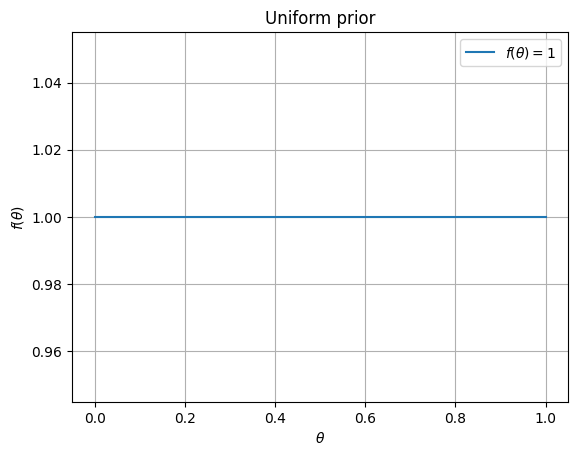

In [ ]:
plt.plot(theta, uniform.pdf(theta), label = r'$f(\theta) = 1$')
plt.legend()
plt.title('Uniform prior')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$f(\theta)$')
plt.grid()
plt.show()

In [ ]:
def posterior(theta):
  return 12 * theta**2 * (1 - theta)

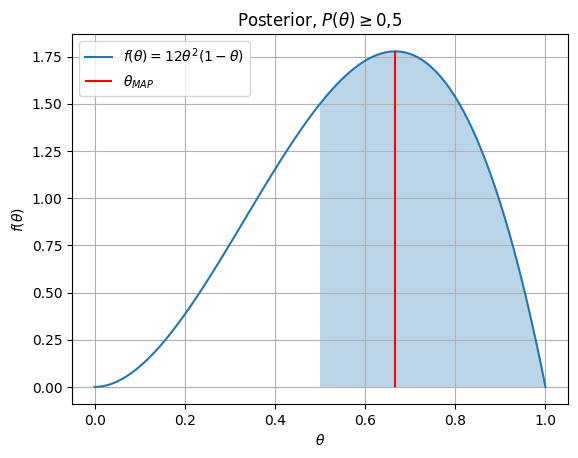

In [ ]:
plt.plot(theta, posterior(theta), label = r'$f(\theta) = 12\theta^2(1-\theta)$')
plt.fill_between(fill_theta, posterior(fill_theta), alpha = 0.3)
plt.vlines(x = 2/3, ymin = 0, ymax = 1.78, colors = 'r', label = r'$\theta_{MAP}$')
plt.legend()
plt.title(r'Posterior, $P(\theta) \geq 0{,}5$')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$f(\theta)$')
plt.grid()
plt.show()

In [ ]:
quad(posterior, 0.5, 1)[0]

0.6875